**Problem Statement**

The problem that we are going to solve here is that given a set of features that describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. To train our machine learning model with insurance data, we will be using [ClaimantsData](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv)


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head(5)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [59]:
## droping CASENUM column:
data.drop(['CASENUM'],axis=1,inplace=True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [60]:
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [61]:
data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [62]:
data.CLMSEX.value_counts()

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

In [63]:
data.CLMSEX.value_counts().index[0]

1.0

In [64]:
data.CLMINSUR.value_counts()

1.0    1179
0.0     120
Name: CLMINSUR, dtype: int64

In [65]:
data.CLMINSUR.value_counts().index[0]

1.0

In [66]:
## creating the user defined functtion for imputing the missing values
### with mode(numeric&categorical)
## lambda-->lambda arguents:expression
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

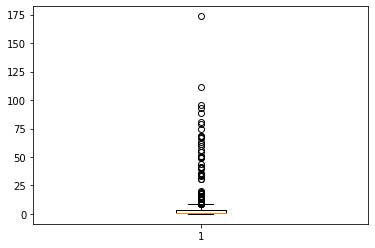

In [67]:
## loss column
plt.boxplot(data.LOSS)
plt.show()

In [68]:
## split the data into input and output
x=data.iloc[:,1:]
y=data.ATTORNEY

In [69]:
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,10.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [70]:
y

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1340, dtype: int64

In [71]:
## split the training and testing
## built the model on traininf data and check the model performance on test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [72]:
## build the classifier 
## sklearn lib:import,instantiate,fit
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [73]:
## prediction on train data
## syntax=objname.predict(input)
y_train_pred=reg.predict(x_train)
y_train_pred


array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [74]:
## confusion matrix for training data
from sklearn.metrics import confusion_matrix,accuracy_score
conf=confusion_matrix(y_train,y_train_pred)
conf

array([[315, 170],
       [108, 345]], dtype=int64)

In [75]:
conf

array([[315, 170],
       [108, 345]], dtype=int64)

In [76]:
## accessing the values of confusion matrix with row index and col index
true_negative=print("true_negative=",conf[0][0])
false_positive=print("false_positive=",conf[0][1])
false_negative=print("false_negative=",conf[1][0])
true_positive=print("true_positive=",conf[1][1])

true_negative= 315
false_positive= 170
false_negative= 108
true_positive= 345


In [77]:
true_positive= conf[0][0]
false_positive= conf[0][1]
false_negative=conf[1][0]
true_negative=conf[1][1]

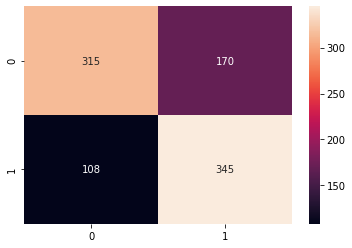

In [78]:
sns.heatmap(conf,annot=True,fmt='3.0f')

In [79]:
## Accuracy -->TP+TN/TP+FP+TN+FN
(315+345)/(315+170+345+108)

0.7036247334754797

In [80]:

from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7036247334754797

In [86]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train,y_train_pred)

0.6699029126213593

In [87]:
precision=true_positive/(true_positive+false_positive)
precision

0.6494845360824743

In [89]:
recall_score(y_train,y_train_pred)

0.7615894039735099

In [88]:
recall=true_positive/(true_positive+false_negative)
recall

0.7446808510638298

In [84]:
## calculation f1-score for the model
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred)

0.712809917355372

In [85]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.6938325991189427

In [ ]:
## im getting diff outputs for formula and importing stmnt

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       485
           1       0.67      0.76      0.71       453

    accuracy                           0.70       938
   macro avg       0.71      0.71      0.70       938
weighted avg       0.71      0.70      0.70       938

